* Importing the necessary libs :

In [1]:
# Imports :

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import time

* Dowloanding the MNIST dataset :

In [2]:

mnist = fetch_openml('mnist_784', as_frame=False)

#randomise Data et target
indices = np.random.randint(10000, size=10000)
data = mnist.data[indices]
target = mnist.target[indices]

# training set of 49000 (70% training set - 30 % test set)
xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=int(len(data)*0.7))

In [33]:
print(mnist.data.shape)

(70000, 784)


* Classification model with a linear `kernel` :

In [3]:
# TRAINING
clf = SVC(kernel='linear')
beginTrain =time.time()
clf.fit(xtrain, ytrain)
endTrain = time.time()

# PREDICTION
beginpred= time.time()
prediction = clf.predict(xtest)
endpred = time.time()

# METRICS
score = clf.score(xtest,ytest)
recall = metrics.recall_score(ytest, prediction, average ='macro')
precision = metrics.precision_score(ytest, prediction,  average='macro')
loss01 = metrics.zero_one_loss(ytest, prediction)
timetrain = endTrain - beginTrain
timePred = endpred - beginpred

> Results :

In [4]:
print("The SVC model with <Linear kernel> has a score of :", score * 100, "%, and a precision = ",precision * 100,"% ", "with a training time = ", timetrain, " s." )

The SVC model with <Linear kernel> has a score of : 95.96666666666667 %, and a precision =  95.97488634872327 %  with a training time =  14.959646463394165  s.


* Kernel variation :

In [5]:
KernelScore =[]
KernelPrecision = []
KernelRecall = []
KernelLoss = []
KernelTimeTraining = []
KernelTimePrediction = []


In [6]:
def changeKernel (mykernel):

    # TRAINING :
    clf = SVC(kernel=mykernel)
    start1 =time.time()
    clf.fit(xtrain, ytrain)
    end1 = time.time()

    # PREDICTION
    start2= time.time()
    predict = clf.predict(xtest)
    end2 = time.time()

    # METRICS
    score = clf.score(xtest,ytest)
    recall = metrics.recall_score(ytest, predict, average ='macro')
    precision = metrics.precision_score(ytest, predict,  average='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = end1 - start1
    timePred = end2 - start2

    #SAVING
    KernelScore.append(score*100)
    KernelPrecision.append(precision*100)
    KernelRecall.append(recall)
    KernelLoss.append(loss01)
    KernelTimePrediction.append(timePred)
    KernelTimeTraining.append(timetrain)

    #PRINT
    print("This SVC model with a kernel = ", mykernel, "has a score of : ", score*100, "%.")
    print("4th image : prediction =",predict[3], "reel one = : ", ytest[3])
    print ("precision :", precision * 100, "%.")
    print ("recall  :",recall * 100, "%.")
    print ("zero-one_loss :",recall * 100, "%.")
    print( "training time :", timetrain, " s")
    print( "prediction time :", timePred, " s")
    print("\n")
    



In [7]:
    
kernels = ('linear', 'poly', 'rbf', 'sigmoid')
for ker in kernels:
    changeKernel(ker)

This SVC model with a kernel =  linear has a score of :  95.96666666666667 %.
4th image : prediction = 4 reel one = :  4
precision : 95.97488634872327 %.
recall  : 95.85018418310659 %.
zero-one_loss : 95.85018418310659 %.
training time : 20.221970558166504  s
prediction time : 7.704949140548706  s


This SVC model with a kernel =  poly has a score of :  96.89999999999999 %.
4th image : prediction = 4 reel one = :  4
precision : 97.00102789114469 %.
recall  : 96.88355690714612 %.
zero-one_loss : 96.88355690714612 %.
training time : 17.644817113876343  s
prediction time : 7.907459497451782  s


This SVC model with a kernel =  rbf has a score of :  97.39999999999999 %.
4th image : prediction = 4 reel one = :  4
precision : 97.36829224922353 %.
recall  : 97.41586359852073 %.
zero-one_loss : 97.41586359852073 %.
training time : 20.9373996257782  s
prediction time : 16.500935554504395  s


This SVC model with a kernel =  sigmoid has a score of :  84.13333333333334 %.
4th image : prediction =

> ==> rbf gives better results !

> Showing this results :

In [8]:
print(KernelScore)
print(KernelPrecision)
print(KernelRecall)
print(KernelLoss)
print(KernelTimeTraining)
print(KernelTimePrediction)

[95.96666666666667, 96.89999999999999, 97.39999999999999, 84.13333333333334]
[95.97488634872327, 97.00102789114469, 97.36829224922353, 83.76437616447545]
[0.9585018418310659, 0.9688355690714612, 0.9741586359852074, 0.8363131657700615]
[0.04033333333333333, 0.031000000000000028, 0.026000000000000023, 0.15866666666666662]
[20.221970558166504, 17.644817113876343, 20.9373996257782, 18.572399139404297]
[7.704949140548706, 7.907459497451782, 16.500935554504395, 10.665112972259521]


> Visualizing the results :

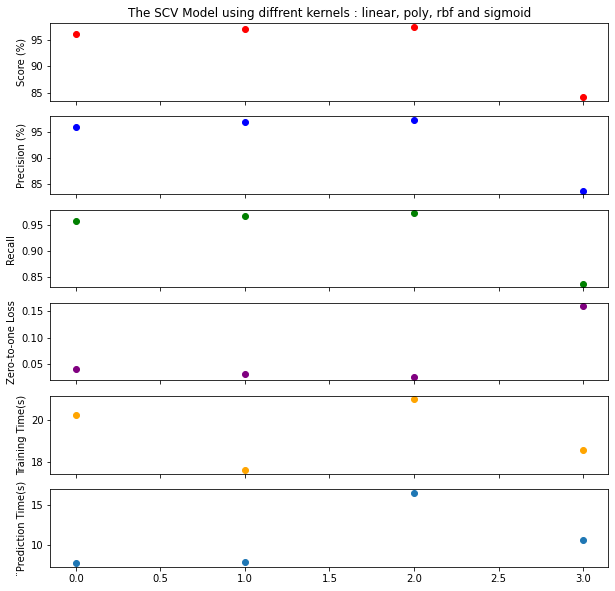

In [11]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].scatter(range(4), KernelScore, c='red')
axarr[0].set_title('The SCV Model using diffrent kernels : linear, poly, rbf and sigmoid')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(4), KernelPrecision, c='blue')
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(4), KernelRecall, c='green')
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(4), KernelLoss, c='purple')
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(4), KernelTimeTraining, c='orange')
axarr[4].set_ylabel('Training Time(s)')
axarr[5].scatter(range(4), KernelTimePrediction)
axarr[5].set_ylabel('¨Prediction Time(s)')

plt.show()

* Variation of C (Tolérance aux erreurs) :


In [12]:
CostScore =[]
CostPrecision = []
CostRecall = []
CostLoss = []
CostTimeTraining = []
CostTimePrediction = []

In [13]:
def changeCost (c):

    # TRAINING :
    clf = SVC(kernel='rbf', C=c)
    start1 = time.time()
    clf.fit(xtrain, ytrain)
    end1 = time.time()

    # PREDICTION
    start2 = time.time()
    predict = clf.predict(xtest)
    end2 = time.time()

    # METRICS
    score = clf.score(xtest,ytest)
    recall = metrics.recall_score(ytest, predict, average ='macro')
    precision = metrics.precision_score(ytest, predict,  average='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = end1 - start1
    timePred = end2 - start2

    #SAVING
    CostScore.append(score*100)
    CostPrecision.append(precision*100)
    CostRecall.append(recall)
    CostLoss.append(loss01)
    CostTimePrediction.append(timePred)
    CostTimeTraining.append(timetrain)

    #PRINT
    print("This SVC Model, kernel rbf et avec un cost ", c, "a un score de ", score*100, "%.")
    print("4eme image : prédiction ",predict[3], "reel : ", ytest[3])
    print ("précision :", precision*100)
    print ("recall  :",recall*100)
    print ("zero-one_loss :",recall*100)
    print( "training time :", timetrain)
    print( "prediction time :", timePred)
    print()

In [24]:

values_of_c = np.linspace(0.1,1, 5, endpoint=True)

In [21]:
for c in values_of_c :
    changeCost(c)

This SVC Model, kernel rbf et avec un cost  0.1 a un score de  92.60000000000001 %.
4eme image : prédiction  4 reel :  4
précision : 92.49348707411444
recall  : 92.51623116108499
zero-one_loss : 92.51623116108499
training time : 66.6435444355011
prediction time : 43.25108981132507

This SVC Model, kernel rbf et avec un cost  0.325 a un score de  95.43333333333334 %.
4eme image : prédiction  4 reel :  4
précision : 95.36769257544184
recall  : 95.39214345810745
zero-one_loss : 95.39214345810745
training time : 36.663654088974
prediction time : 29.3434476852417

This SVC Model, kernel rbf et avec un cost  0.55 a un score de  96.39999999999999 %.
4eme image : prédiction  4 reel :  4
précision : 96.34660104357073
recall  : 96.39972251628339
zero-one_loss : 96.39972251628339
training time : 24.373640537261963
prediction time : 21.659759044647217

This SVC Model, kernel rbf et avec un cost  0.775 a un score de  97.1 %.
4eme image : prédiction  4 reel :  4
précision : 97.05572266953281
recall 

* Visualizing the results :

In [25]:
print(CostScore)
print(CostPrecision)
print(CostRecall)
print(CostLoss)
print(CostTimeTraining)
print(CostTimePrediction)

[92.60000000000001, 95.43333333333334, 96.39999999999999, 97.1, 97.39999999999999]
[92.49348707411444, 95.36769257544184, 96.34660104357073, 97.05572266953281, 97.36829224922353]
[0.9251623116108499, 0.9539214345810745, 0.9639972251628339, 0.9711240495722804, 0.9741586359852074]
[0.07399999999999995, 0.04566666666666663, 0.03600000000000003, 0.029000000000000026, 0.026000000000000023]
[66.6435444355011, 36.663654088974, 24.373640537261963, 25.29637050628662, 24.963185787200928]
[43.25108981132507, 29.3434476852417, 21.659759044647217, 22.529597282409668, 21.115185260772705]


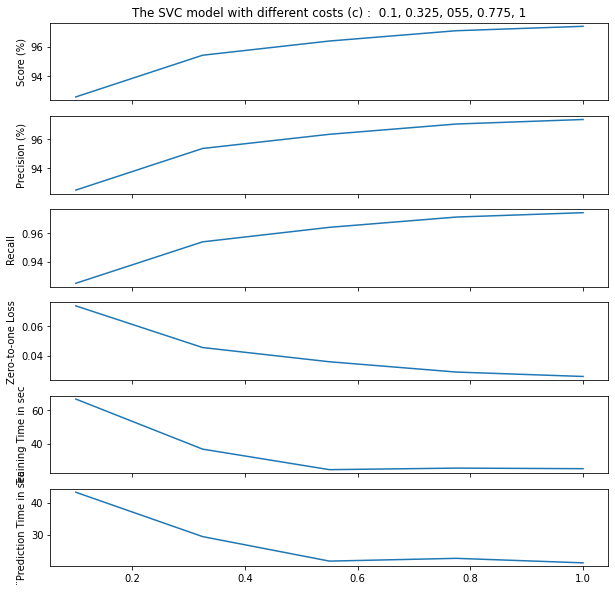

In [30]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].plot(values_of_c, CostScore)
axarr[0].set_title('The SVC model with different costs (c) :  0.1, 0.325, 055, 0.775, 1')
axarr[0].set_ylabel('Score (%)')
axarr[1].plot(values_of_c, CostPrecision)
axarr[1].set_ylabel('Precision (%)')
axarr[2].plot(values_of_c, CostRecall)
axarr[2].set_ylabel('Recall ')
axarr[3].plot(values_of_c, CostLoss)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].plot(values_of_c, CostTimeTraining)
axarr[4].set_ylabel('Training Time in sec')
axarr[5].plot(values_of_c, CostTimePrediction)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()

*  Confusion Matrix :

In [28]:
# matrice de confusion

from sklearn.metrics import confusion_matrix

clasifier = SVC(kernel='linear')

begin = time.time()
clasifier.fit(xtrain,ytrain)
predicted = clasifier.predict(X=xtest)
end = time.time()

print("score: ", clasifier.score(xtest, ytest))

total_time = end - begin
print("time: ", total_time)

print(confusion_matrix(ytest,predicted))

score:  0.9596666666666667
time:  15.103962898254395
[[304   0   0   0   0   0   1   0   0   0]
 [  0 345   0   0   0   1   0   0   1   1]
 [  1   2 300   0   2   2   1   1   4   1]
 [  2   1   2 295   0   4   0   3   2   0]
 [  1   0   2   0 282   0   1   1   0   5]
 [  1   0   0   4   3 243   3   0   0   0]
 [  3   0   4   0   2   1 280   0   1   0]
 [  1   1   6   0   2   0   0 326   0   5]
 [  0   4   3   3   1   2   2   0 255   3]
 [  0   2   2   0   5   0   0  15   0 249]]


* data variation VS confusion matrix

In [29]:
RScore =[]
RPrecision = []
RRecall = []
RLoss = []
RTimeTraining = []
RTimePrediction = []

for i in (10000,20000,30000,40000,50000):
    #DATA
    #randomise Data et target
    indices = np.random.randint(i, size=i)
    data = mnist.data[indices]
    target = mnist.target[indices]
    
    # on veut un training set de 49000 (70% training set - 30 % test set)
    xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=int(len(data)*0.7))

    # TRAINING
    clf = SVC(kernel='linear', C=1)
    startTrain =time.time()
    clf.fit(xtrain, ytrain)
    endTrain = time.time()

    # PREDIC
    startpred= time.time()
    predict = clf.predict(xtest)
    endpred = time.time()

    # METRICS
    score = clf.score(xtest,ytest)
    recall = metrics.recall_score(ytest, predict, average ='macro')
    precision = metrics.precision_score(ytest, predict,  average='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    cm = metrics.confusion_matrix(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred

    #Append
    RScore.append(score*100)
    RPrecision.append(precision*100)
    RRecall.append(recall)
    RLoss.append(loss01)
    RTimePrediction.append(timePred)
    RTimeTraining.append(timetrain)

    #Print
    print("this SVC Model has a score of ", score*100, "%.")
    print("4th image : prediction >> ",predict[3], "reel one >> : ", ytest[3])
    print ("prEcision :", precision*100)
    print ("recall  :",recall*100)
    print ("zero-one_loss :",recall*100)
    print( "training time :", timetrain)
    print( "prediction time :", timePred)
    print(cm)
    print("\n")

this SVC Model has a score of  96.03333333333333 %.
4th image : prediction >>  3 reel one >> :  3
prEcision : 96.0119157591558
recall  : 95.89713470338673
zero-one_loss : 95.89713470338673
training time : 12.147644519805908
prediction time : 6.893997430801392
[[271   0   1   2   1   0   5   0   0   0]
 [  0 351   2   0   1   1   0   0   0   0]
 [  0   1 269   2   1   0   2   4   5   0]
 [  0   4   3 309   0   5   0   1   1   1]
 [  0   1   1   1 280   0   0   0   0   3]
 [  3   2   2   3   3 254   2   0   1   0]
 [  2   2   0   0   2   0 290   0   3   0]
 [  1   1   2   0   3   0   0 328   0   3]
 [  2   3   5   2   1   4   3   1 233   0]
 [  1   0   2   1   4   0   0   6   0 296]]


this SVC Model has a score of  96.33333333333334 %.
4th image : prediction >>  9 reel one >> :  4
prEcision : 96.3122619552498
recall  : 96.32813845439289
zero-one_loss : 96.32813845439289
training time : 39.758506774902344
prediction time : 25.059584617614746
[[555   0   0   0   0   1   0   0   1   1]
 [ 